Import Necessary Libraries

In [1]:
import cv2 as cv
import numpy as np
import os

loading path to the dataset

In [2]:
dirDataSet = "../DataSet"

Data preprocessing

In [3]:
# Initialize lists to store images and their corresponding labels
images = []
labels = []

# Loop over each type of fruit in the dataset directory
for fruitType in os.listdir(dirDataSet):
    # Construct the path to the current fruit type directory
    fruitTypePath = os.path.join(dirDataSet, fruitType)
    
    # Check if the current path is a directory
    if os.path.isdir(fruitTypePath):
        # Loop over each image of the current fruit type
        for fruit in os.listdir(fruitTypePath):
            # Construct the path to the current fruit image
            fruitPath = os.path.join(fruitTypePath, fruit)
            
            try :
                # Read the image in grayscale
                image = cv.imread(fruitPath,0)
                
                # Resize the image to 256x256 pixels
                image = cv.resize(image, (256, 256))
                
                # Flatten the image into a 1D array
                image  = np.array(image).flatten()
                
                # Append the image and its label to their respective lists
                images.append(image)
                labels.append(fruitType)
                
            except Exception as e:
                # If an error occurred while processing the image, skip it
                continue

In [4]:
print(labels[0])    # Print first label
print(images[0])    # Print first image

freshapples
[0 0 0 ... 0 0 0]


In [5]:
image.shape     # Dimensional details

(65536,)

In [6]:
# Import the LabelEncoder class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the labels and transform the labels to encoded values
labels = le.fit_transform(labels)

In [7]:
images = np.array(images)   # Converting the image array to numpy array
labels = np.array(labels)   # Convertingthe label array into numpy array

In [8]:
images.shape, labels.shape

((5031, 65536), (5031,))

In [9]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the images and labels into training and testing sets
# 30% of the data will be used for testing and 70% for training
# The random_state parameter ensures that the splits generate are reproducible
imgTrain,imgTest,labelTrain,labelTest = train_test_split(images,labels,test_size=0.3,random_state=42)

In [10]:
imgTest.shape,labelTest.shape

((1510, 65536), (1510,))

In [11]:
imgTrain.shape,labelTrain.shape

((3521, 65536), (3521,))

In [12]:
# Import the Support Vector Classifier (SVC) from sklearn.svm
from sklearn.svm import SVC

# Create an instance of the SVC classifier
# The C parameter is set to 1, which is the regularization parameter
# The kernel is set to 'poly' for polynomial kernel
# The gamma parameter is set to 'auto', which uses 1 / n_features
model = SVC(C=1,kernel='poly',gamma='auto')

# Fit the classifier to the training data
# The model learns to classify images based on the training data
model.fit(imgTrain, labelTrain)

SVC(C=1, gamma='auto', kernel='poly')

In [13]:
# Use the trained model to predict the labels of the test images
y_pred = model.predict(imgTest)

# Import the pickle module
import pickle

# Save the trained model to a file using pickle
# The 'wb' argument signifies that the file is opened for writing in binary mode
pickle.dump(model, open('NewDatasetModel.pkl','wb'))

# Print a message to indicate that the model has been saved
print("Model saved")

Model saved


In [14]:
# import accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labelTest,y_pred)
accuracy

0.8271523178807947

Accuracy on the test set: 82.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       639
           1       0.85      0.85      0.85       871

    accuracy                           0.83      1510
   macro avg       0.82      0.82      0.82      1510
weighted avg       0.83      0.83      0.83      1510



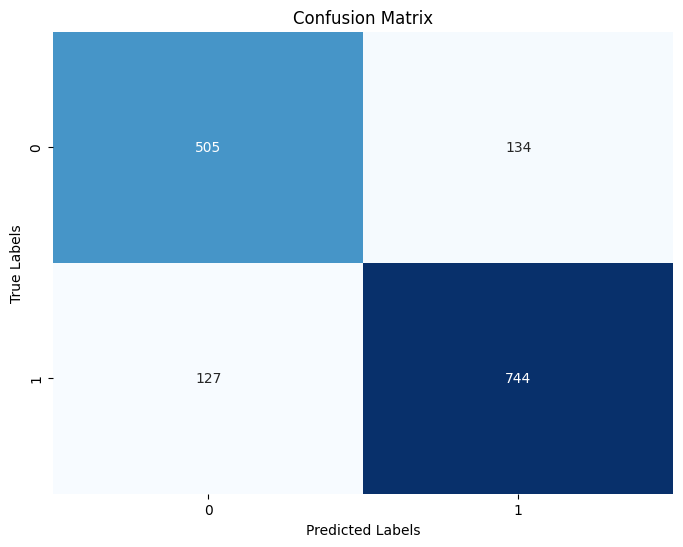

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
labelPred = model.predict(imgTest)

# Calculate accuracy
accuracy = accuracy_score(labelTest, labelPred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(labelTest, labelPred))

# Plot Confusion Matrix
cm = confusion_matrix(labelTest, labelPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
